<a href="https://colab.research.google.com/github/zappy586/AIML_Module_4_Lab_1_Perceptron_Mohd_Zeeshan-MJCET-/blob/main/AIML_Module_4_Lab_1_Perceptron_Mohd_Zeeshan(MJCET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My model(Titanic dataset classification) is after the initial tutorial:👇
## Module 4: Perceptron and Gradient Descent.
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

len(X)

5

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

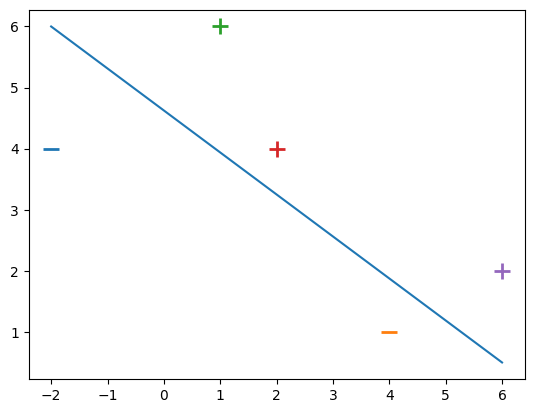

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

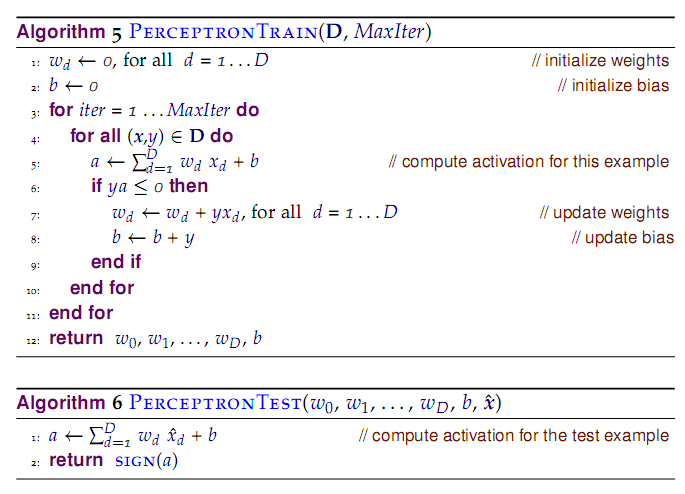

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

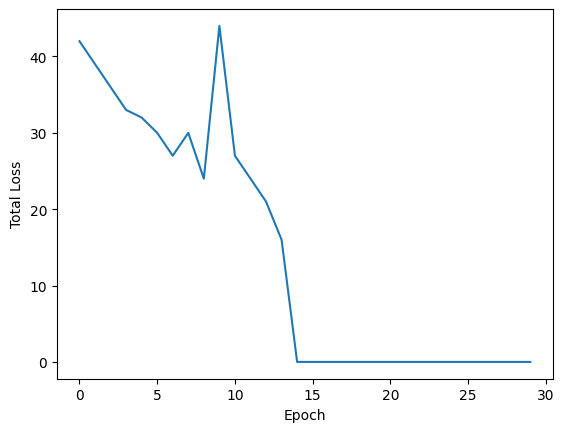

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

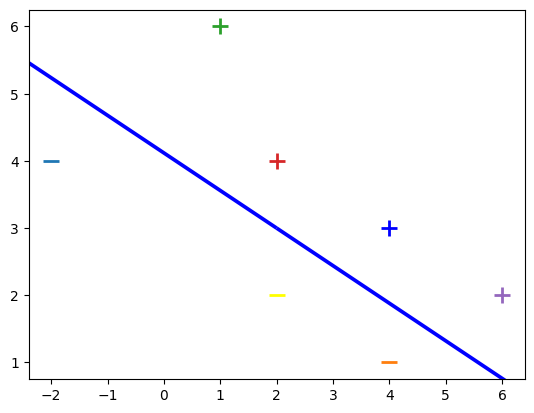

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


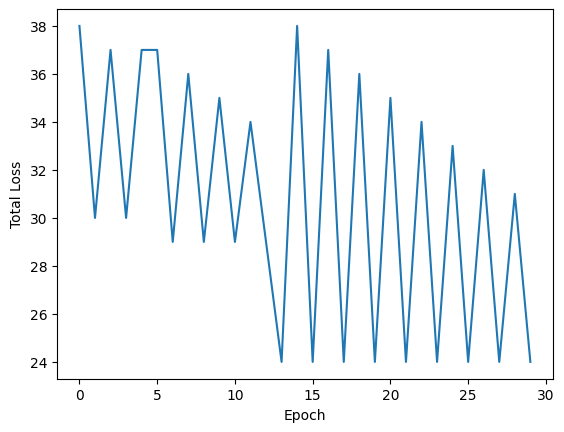

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

# **Experimenting with other datasets**

##for this, we will be using the classic and legandary-Titanic dataset. This dataset contains various features and information about the people onboard the titanic like age, sex, relatives onboard, etc. Our task is to predict or classify survavability of someone based on these features using a Perceptron.

In [82]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

##Since columns like 'cabin' and 'sex' contain non-numeric values, we will have to map them to certain numeric values for our model

In [83]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'])
cabin_mapping = {cabin: idx + 1 for idx, cabin in enumerate(df_train['Cabin'].unique()) if pd.notna(cabin)}
df_train['Cabin'] = df_train['Cabin'].map(cabin_mapping).fillna(0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0,0,0,1


##now for test dataset

In [84]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test = pd.get_dummies(df_test, columns=['Embarked'])
cabin_mapping = {cabin: idx + 1 for idx, cabin in enumerate(df_test['Cabin'].unique()) if pd.notna(cabin)}
df_test['Cabin'] = df_test['Cabin'].map(cabin_mapping).fillna(0)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0.0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0.0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0.0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0.0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0.0,0,0,1


##Now, we drop some columns we dont need like name and ticket no.

In [85]:
df_train = df_train.drop(columns=["PassengerId","Name", "Ticket"])
df_test = df_test.drop(columns=["PassengerId","Name", "Ticket"])

In [86]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0.0,0,1,0
1,3,1,47.0,1,0,7.0000,0.0,0,0,1
2,2,0,62.0,0,0,9.6875,0.0,0,1,0
3,3,0,27.0,0,0,8.6625,0.0,0,0,1
4,3,1,22.0,1,1,12.2875,0.0,0,0,1


In [87]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [88]:
X_train = df_train.drop(columns=["Survived"])
y_train = df_train["Survived"]
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

##im using standard scalar function of sklearn to standardize the features since I dont know how to do it with pure python

In [104]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0.0,0,1,0
1,3,1,47.0,1,0,7.0000,0.0,0,0,1
2,2,0,62.0,0,0,9.6875,0.0,0,1,0
3,3,0,27.0,0,0,8.6625,0.0,0,0,1
4,3,1,22.0,1,1,12.2875,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0.0,0,0,8.0500,0.0,0,0,1
414,1,1,39.0,0,0,108.9000,77.0,1,0,0
415,3,0,38.5,0,0,7.2500,0.0,0,0,1
416,3,0,0.0,0,0,8.0500,0.0,0,0,1


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [91]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

AttributeError: ignored

In [92]:
X_train

array([[ 1.        ,  0.82737724, -0.73769513, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 1.        , -1.56610693,  1.35557354, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 1.        ,  0.82737724,  1.35557354, ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 1.        ,  0.82737724,  1.35557354, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 1.        , -1.56610693, -0.73769513, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 1.        ,  0.82737724, -0.73769513, ..., -0.48204268,
         3.25137334, -1.61470971]])

#Perceptron training for the Titanic Dataset!

In [115]:
def train_perceptron(X, y, learning_rate=1e-5, epochs=10000):
    weights = np.zeros(X.shape[1])
    errors = []
    for epoch in range(epochs):
        error_epoch = 0
        for i in range(X.shape[0]):
            prediction = np.dot(X[i], weights)
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            error_epoch += abs(error)
        errors.append(error_epoch)

        # Print progress
        if epoch % 100 == 0:
            print(f'Epoch {epoch}/{epochs} - Error: {error_epoch / X.shape[0] * 100:.2f}%')

    print(f'Training complete. Final error: {error_epoch / X.shape[0] * 100:.2f}%')
    return weights, errors

In [116]:
weights, errors = train_perceptron(X_train, y_train)

Epoch 0/10000 - Error: 38.33%
Epoch 100/10000 - Error: 31.07%
Epoch 200/10000 - Error: 29.86%
Epoch 300/10000 - Error: 29.59%
Epoch 400/10000 - Error: 29.48%
Epoch 500/10000 - Error: 29.43%
Epoch 600/10000 - Error: 29.39%
Epoch 700/10000 - Error: 29.36%
Epoch 800/10000 - Error: 29.35%
Epoch 900/10000 - Error: 29.34%
Epoch 1000/10000 - Error: 29.33%
Epoch 1100/10000 - Error: 29.32%
Epoch 1200/10000 - Error: 29.32%
Epoch 1300/10000 - Error: 29.32%
Epoch 1400/10000 - Error: 29.31%
Epoch 1500/10000 - Error: 29.31%
Epoch 1600/10000 - Error: 29.31%
Epoch 1700/10000 - Error: 29.31%
Epoch 1800/10000 - Error: 29.31%
Epoch 1900/10000 - Error: 29.31%
Epoch 2000/10000 - Error: 29.31%
Epoch 2100/10000 - Error: 29.31%
Epoch 2200/10000 - Error: 29.31%
Epoch 2300/10000 - Error: 29.31%
Epoch 2400/10000 - Error: 29.31%
Epoch 2500/10000 - Error: 29.31%
Epoch 2600/10000 - Error: 29.31%
Epoch 2700/10000 - Error: 29.31%
Epoch 2800/10000 - Error: 29.31%
Epoch 2900/10000 - Error: 29.31%
Epoch 3000/10000 - Err

#Making Predictions

In [124]:
def predict(X, weights):
    return np.where(np.dot(X, weights) >= 0, 1, 0)

In [125]:
y_pred = predict(X_test, weights)

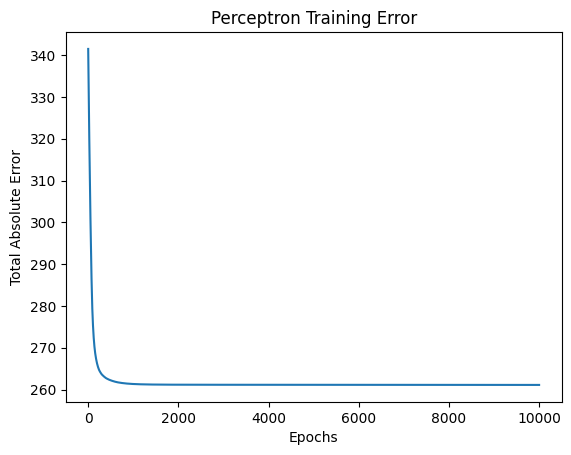

In [126]:
plt.plot(errors)
plt.title('Perceptron Training Error')
plt.xlabel('Epochs')
plt.ylabel('Total Absolute Error')
plt.show()

In [133]:
df_test = pd.read_csv('test.csv')

In [134]:
subm_df = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Survived": y_pred})
subm_df.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


##Since this is part of a kaggle competition, it doesn't have the ground truths so to get the accuracy score with test dataset, we will have to submit it in the competition.

In [138]:
subm_df.to_csv("submission.csv", index=False)

#Results:
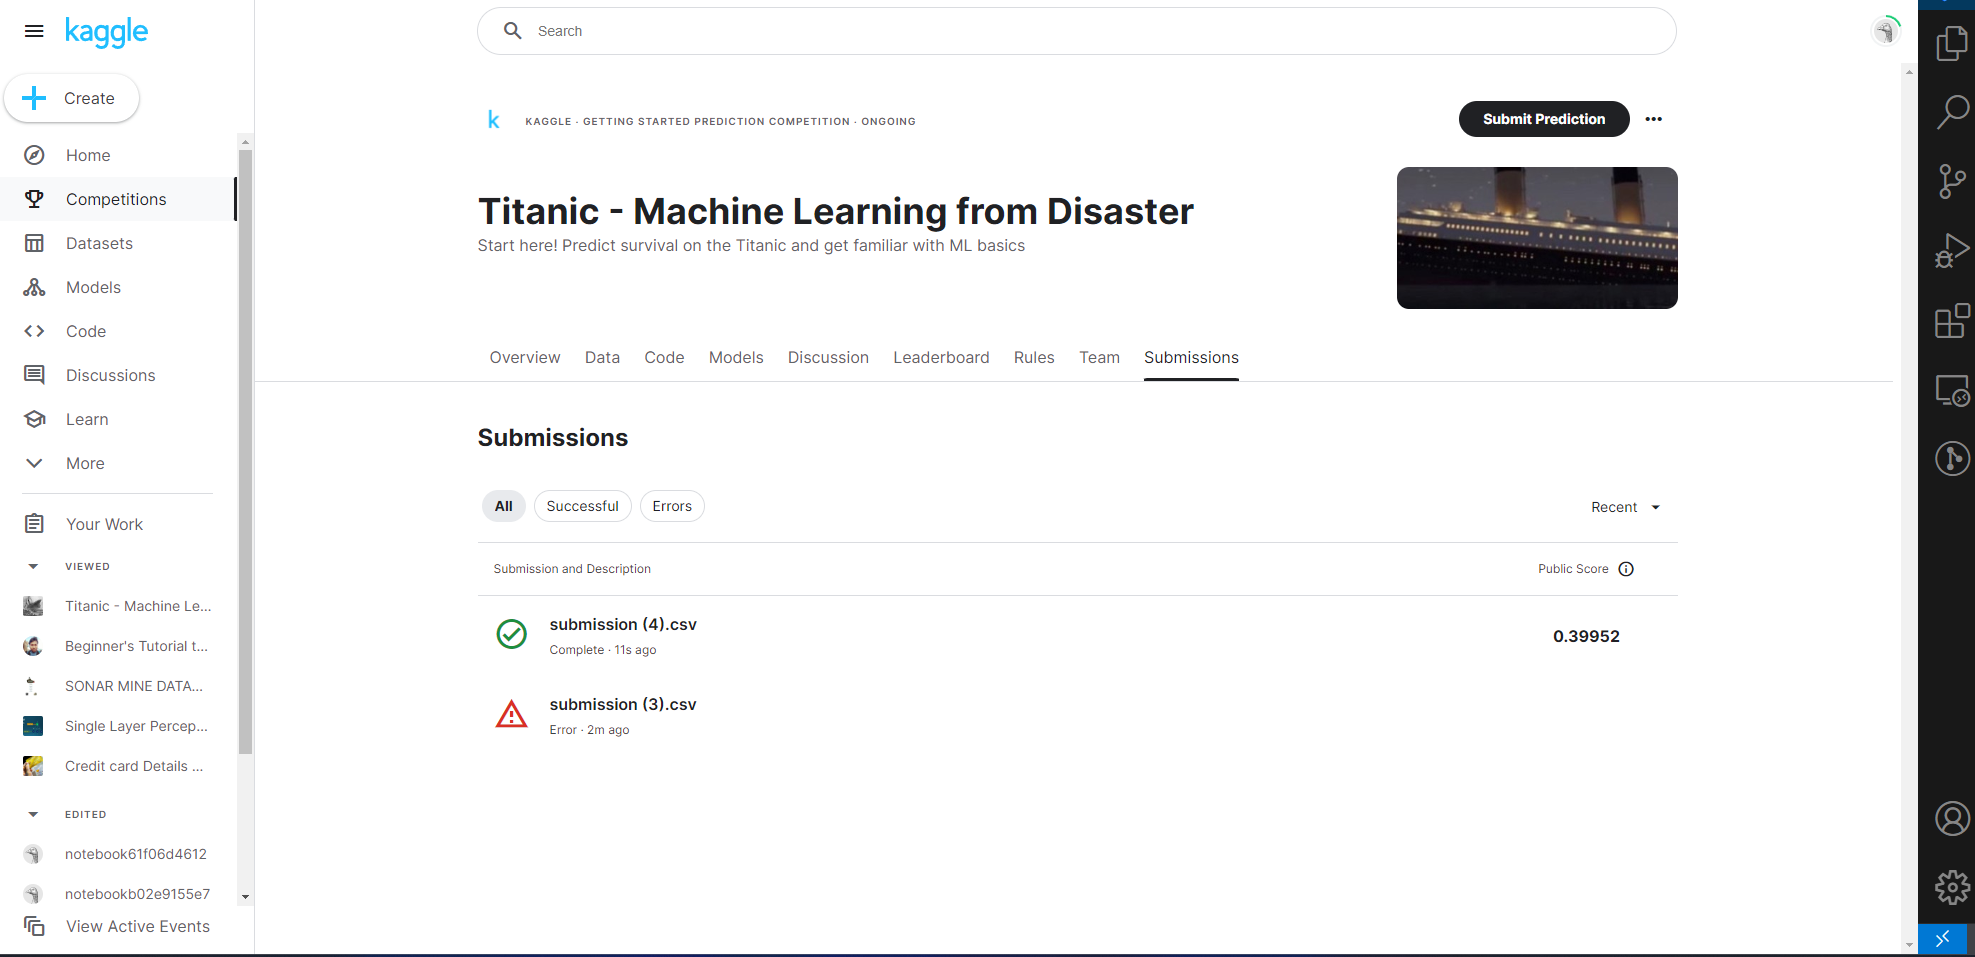

##Welp, turns out Perceptron algorithm isn't quite suitable for this type of data but still, a score of 40% is okay for an algorithm made in 1957.